## Lending Club Case Study

### Step:1 Installing the libraries

In [373]:
# Numerical and Data Analysis & Data Visualization
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Step:2 Importing necessary librarires

In [404]:
# Importing the librarires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Step:3 Loading the data-set

In [411]:
# Loading the "loan" data set to initiate the analysis
loan_df = pd.read_csv("loan.csv", low_memory=False)

### Step:3.1 Verifying the data-set & columns

In [412]:
# to have a glance of loaded data
loan_df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [413]:
# verify the shape of the dataset
loan_df.shape
# rows:39717 & cols:111

(39717, 111)

In [414]:
# Verifying Datatype & Null Values of Columns
loan_df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

### Step:3.2 Removing columns having Blank values completely

In [415]:
#Before drop: column count = 111  
loan_df.dropna(how = 'all', axis=1, inplace=True)

#After drop: column count = 57
loan_df.shape

(39717, 57)

In [416]:
# verifying, if the columns are dropped correctly
print(round(100*loan_df.isnull().sum()/loan_df.shape[0]))

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

### Step:3.3 Dropping columns with high percentage of blank values >30%

In [420]:
## Dropping(mths_since_last_delinq, mths_since_last_record, next_pymnt_d)

## Since [desc] column contains 32.5% blank values and also it is not relevant for analysis. 
## It is a free text column without standardization. So dropping this column.

loan_df = loan_df.drop(columns=['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d'])

In [421]:
loan_df.info() 
# Out of 111 columns 58 columns are dropped and 53 are available for further analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Step:3.4 Verifying uniqueness across all 39717 Records

In [437]:
## Step 3.4.1: Columns having all unique values
## Step 3.4.2: Columns having all same values
loan_df.nunique()

loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8202
term                           2
int_rate                     371
installment                15376
grade                          7
sub_grade                     35
emp_length                    11
home_ownership                 5
annual_inc                  5307
verification_status            3
issue_d                       55
loan_status                    3
purpose                       14
title                      19609
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21706
revol_util                  1089
total_acc                     82
out_prncp                   1137
out_prncp_inv               1138
total_pymnt                36577
total_pymn

### Step:3.5 Dropping coulmns having either single value or irrelevant for analysis

In [422]:
uniq_val_columns_todrop = ['id','member_id', 'url', 'pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths','delinq_amnt', 'tax_liens', 'emp_title']
# Loop to drop columns having either one value or irrelevant for analysis
loan_df = loan_df.drop(columns=uniq_val_columns_todrop)     

In [423]:
loan_df.nunique()

loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc                     82
out_prncp                   1137
out_prncp_inv               1138
total_pymnt                37850
total_pymn

In [424]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

In [426]:
print(round(100*loan_df.isnull().sum()/loan_df.shape[0]))

loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 3.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
title                      0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_re

#### Step 4.1: Formatting the columns, changing appropriate datatype 

In [427]:
## earliest_cr_line, issue_d, revol_util, total_pymnt
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y')
loan_df['earliest_cr_line_year'] = pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y').dt.year
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')
loan_df['issue_d_year'] = loan_df['issue_d'].dt.year
loan_df['revol_util'] = loan_df['revol_util'].apply(lambda x: float(str(x).replace('%',''))/100)

## standardizing precision to 2 decimal points
loan_df['total_pymnt'] = round(loan_df['total_pymnt'],2)

In [428]:
## term & int_rate column
loan_df['term'] = loan_df['term'].str.replace(' months', '', regex=False).astype(int)
loan_df['int_rate'] = loan_df['int_rate'].str.replace('%', '', regex=False).astype(float)

#### Step 4.2: Handling outliers

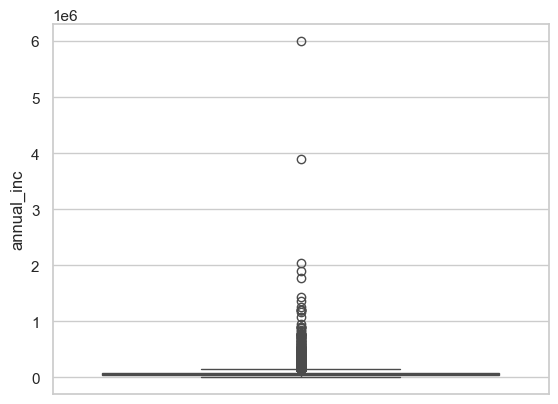

In [431]:
## verifying outliers 
## plot before outliers
sns.boxplot(loan_df['annual_inc'])
plt.show()

In [432]:
## removing outlier from 'annual_inc' column (>1,000,000)
loan_df = loan_df[~(loan_df['annual_inc']>1000000)]
loan_df.shape

(39703, 41)

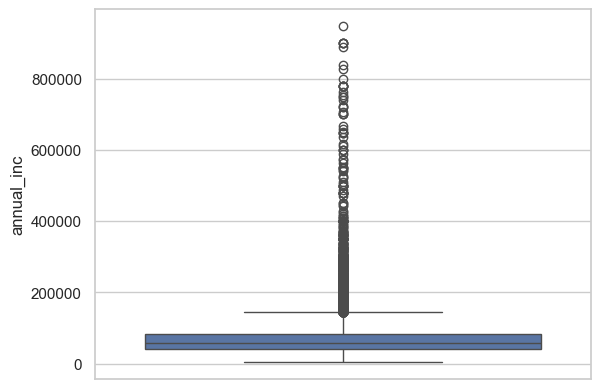

In [433]:
## plot after outliers
sns.boxplot(loan_df['annual_inc'])
plt.show()

### Step 5: Analysis & Insights

#### Step 5.1: Loan Purpose vs Loan Status

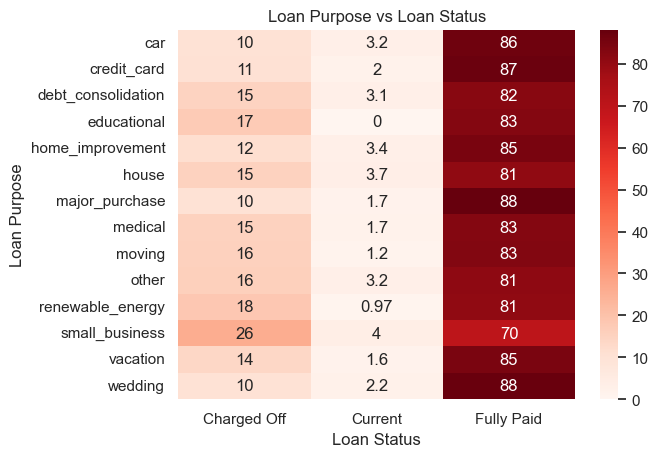

In [441]:
sns.heatmap(pd.crosstab(index=loan_df['purpose'], columns=loan_df['loan_status'],normalize='index')*100,cmap='Reds',annot=True)
# Add title and labels
plt.title('Loan Purpose vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Purpose')
plt.show()
## ***********Insight****************** 
## Small_business tend to default more
## ***********Insight******************

#### Step 5.2: Address State vs Loan Status

In [450]:
(pd.crosstab( index=loan_df['addr_state'], columns=loan_df['loan_status'],normalize='index')*100).sort_values('Charged Off',ascending=False)
## ***********Insight*************************************
## Nebraska (NE) and Nevada (NV) have higher tendency to default
## ***********Insight*************************************

loan_status,Charged Off,Current,Fully Paid
addr_state,,,
NE,60.000000,0.000000,40.000000
NV,21.730382,3.621730,74.647887
AK,18.750000,2.500000,78.750000
SD,18.750000,3.125000,78.125000
FL,17.591623,2.966841,79.441536
ID,16.666667,0.000000,83.333333
MO,16.618076,2.332362,81.049563
HI,16.091954,4.597701,79.310345
NM,15.957447,3.191489,80.851064


#### Step 5.3: Term vs Loan Status & 
#### Step 5.4: Grade vs Loan Status

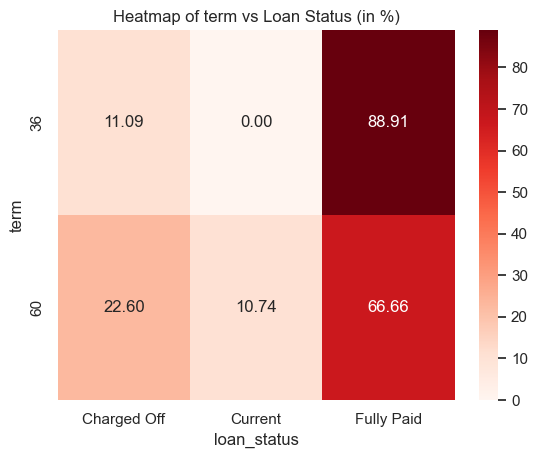

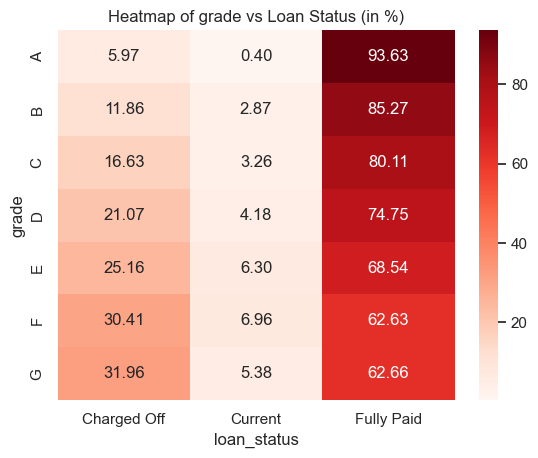

In [554]:
## Create a Heatmap graphs for 
### 1.Term vs loan status 
### 2.Grade vs loan status 

col_term_and_grade = ['term', 'grade']
col_loan_status = 'loan_status'

for col in col_term_and_grade:
    crosstab = pd.crosstab(loan_df[col], loan_df[col_loan_status],normalize='index')*100

    # Create heatmap for all columns, with rows sorted by the selected column
    sns.heatmap(crosstab, annot=True, fmt='.2f', cmap="Reds", cbar=True)
    
    # Set labels and title
    plt.title('Heatmap of '+ col +' vs Loan Status (in %)')
    plt.xlabel(col_loan_status)
    plt.ylabel(col)
    
    # Show the plot
    plt.show()

## ***********Insight*************************************
## Long Term 60 months have tendency to get default.
## Lower the grade higher then tendency to get default.
## ***********Insight*************************************

#### Step 5.5: Revol_Util vs Loan Status

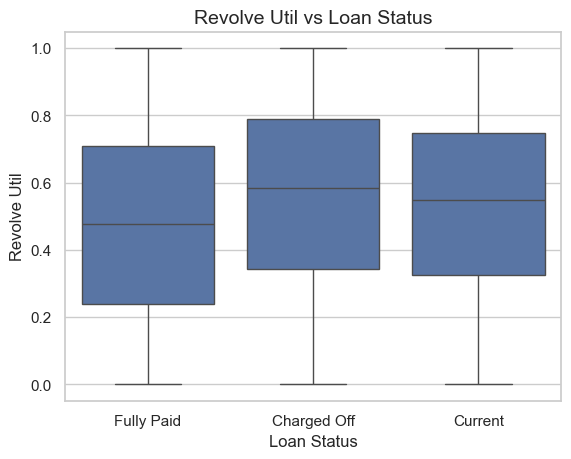

In [557]:
ax = sns.boxplot(loan_df, x='loan_status',y='revol_util')

# Add labels and title
ax.set_xlabel("Loan Status", fontsize=12)
ax.set_ylabel("Revolve Util", fontsize=12)
ax.set_title("Revolve Util vs Loan Status", fontsize=14)

# Show the plot
plt.show()

## ***********Insight*************************************
## Defaulters tend to have a higher median revolving line utilization 
## ..rate or else they are using more credit out of the total available credit
## ***********Insight*************************************

#### Step 5.6: Public Record of Bankruptices vs Loan Status

In [456]:
pd.crosstab( index=loan_df['pub_rec_bankruptcies'], columns=loan_df['loan_status'],normalize='index')*100

## ***********Insight*************************************
## if there is atleast 1 or more public bankruptcy logged, 
## ..higher will be the chances of default
## ***********Insight*************************************

loan_status,Charged Off,Current,Fully Paid
pub_rec_bankruptcies,,,
0.0,13.770562,2.949687,83.279751
1.0,21.863799,2.210275,75.925926
2.0,28.571429,28.571429,42.857143


#### Step 5.7: Employee Count vs Loan Status

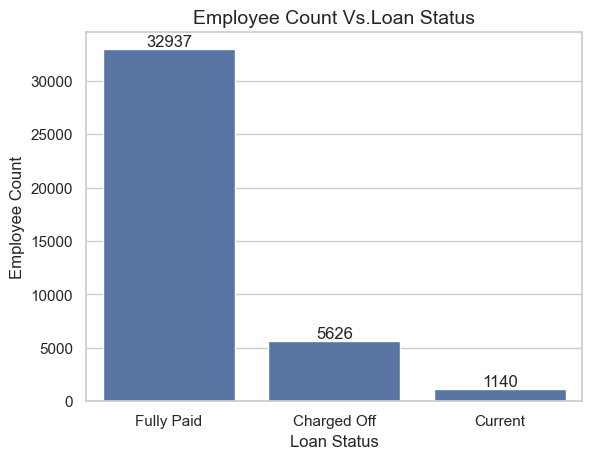

In [469]:
## Loan Statuses Vs No. of employees
empCountPlot = sns.countplot(x=loan_df["loan_status"])
abs_values = loan_df['loan_status'].value_counts(ascending=False).values
#empCountPlot.bar_label(container=empCountPlot.containers[0], labels=abs_values)

for container in empCountPlot.containers:
    empCountPlot.bar_label(container)

empCountPlot.set_xlabel("Loan Status", fontsize=12)
empCountPlot.set_ylabel("Employee Count", fontsize=12)
empCountPlot.set_title('Employee Count Vs.Loan Status', fontsize=14)

plt.show()

## ***********Insight*************************************
## In given dataset Defaulter count is in between fully paid and current 
## ***********Insight*************************************

#### Step 5.8.1: Employee Count vs Aplication Issue Year

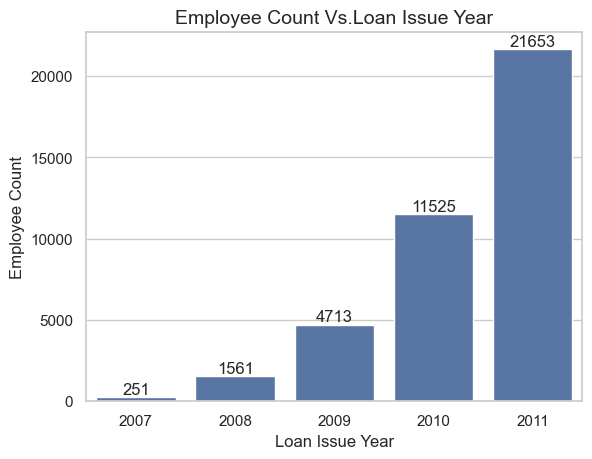

In [526]:
## Application issue based on years
appCountPlot = sns.countplot(x=loan_df["issue_d_year"])
abs_values = loan_df['issue_d_year'].value_counts(ascending=False).values

for container in appCountPlot.containers:
    appCountPlot.bar_label(container)

appCountPlot.set_xlabel("Loan Issue Year", fontsize=12)
appCountPlot.set_ylabel("Employee Count", fontsize=12)
appCountPlot.set_title('Employee Count Vs.Loan Issue Year', fontsize=14)

plt.show()

## ***********Insight*************************************
## No. of Loan application Issuance, yearwise  
## ***********Insight*************************************

#### Step 5.8.2: Loan Issue Year Vs Charged Off (%)

Text(0.5, 1.0, 'Loan Issue Year Vs Charged Off (%)')

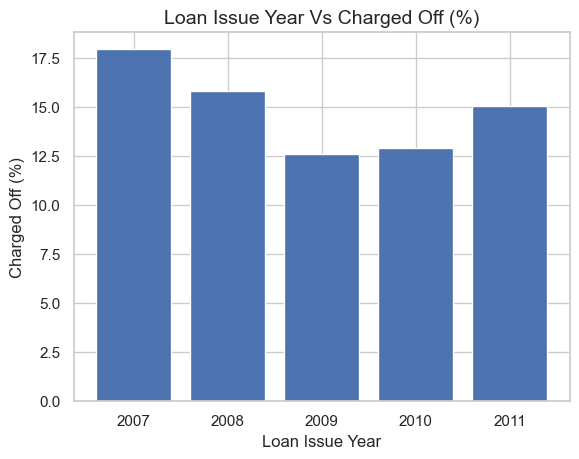

In [570]:
cr_tab = (pd.crosstab( index=loan_df['issue_d_year'], columns=loan_df['loan_status'],normalize='index')*100).sort_index()
appCountPlot = plt.bar(cr_tab.index, cr_tab['Charged Off'])

plt.xlabel("Loan Issue Year", fontsize=12)
plt.ylabel("Charged Off (%)", fontsize=12)
plt.title('Loan Issue Year Vs Charged Off (%)', fontsize=14)

## ***********Insight*************************************
## Charged of % decreased from 2007 - 2009 & further increased from 2009 - 2011  
## ***********Insight*************************************          

#### Step 5.9.1: Employee Count vs Source Verification Status

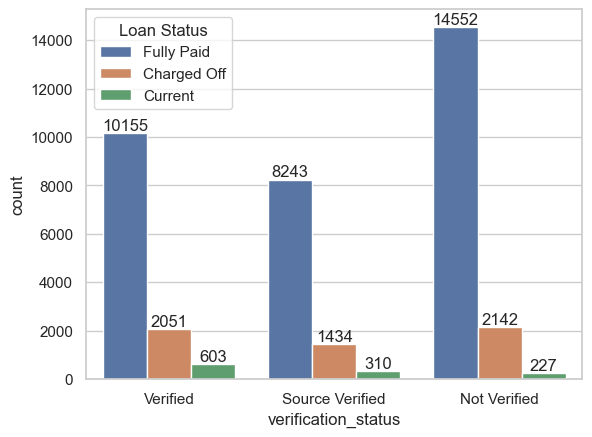

In [468]:
## Source Verification Status Vs No. of employees
empCountforLoanIssue = sns.countplot(x=df["verification_status"], hue='loan_status', data=df)
abs_values = df['verification_status'].value_counts(ascending=False).values
for container in empCountforLoanIssue.containers:
    empCountforLoanIssue.bar_label(container)
empCountforLoanIssue.legend(title='Loan Status', loc='best')

plt.show
## ***********Insight*************************************
## verified status has more percentage of defaulters.
## ***********Insight*************************************

#### Step 5.9.2: Employee Count(%) By Source Verification Status

In [571]:
pd.crosstab( index=loan_df['verification_status'], columns=loan_df['loan_status'],normalize='index')*100

loan_status,Charged Off,Current,Fully Paid
verification_status,,,
Not Verified,12.664065,1.342083,85.993851
Source Verified,14.365859,3.105590,82.528551
Verified,16.006871,4.708363,79.284766


#### Step 5.10: Employee Count vs Purpose of Loan

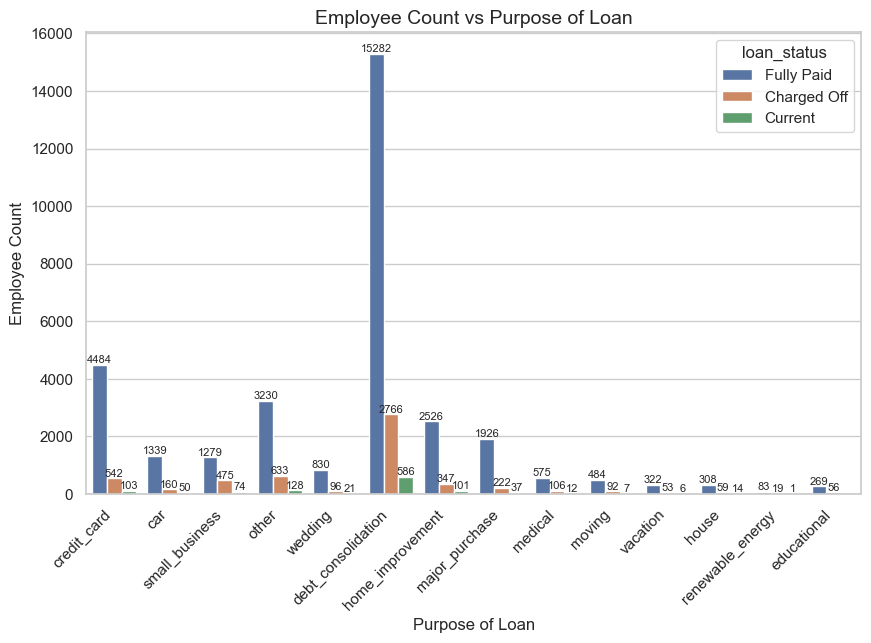

In [572]:
#Analyzing the count of employes according to the purpose of taking loans 

# Creating a countplot
plt.figure(figsize=(10, 6))
empPurpose = sns.countplot(x=loan_df["purpose"],  hue='loan_status', data=loan_df)
abs_values = loan_df['purpose'].value_counts(ascending=False).values
for container in empPurpose.containers:
    empPurpose.bar_label(container, fontsize=8)

# Set x-axis and y-axis labels
empPurpose.set_xlabel("Purpose of Loan", fontsize=12)
empPurpose.set_ylabel("Employee Count", fontsize=12)

# Set plot title
empPurpose.set_title("Employee Count vs Purpose of Loan", fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.show()

## ***********Insight*************************************
## Debt consolidation purpose have the most no.of defaulters  
## ***********Insight*************************************

#### Step 5.11: Employee Count vs Home Ownership

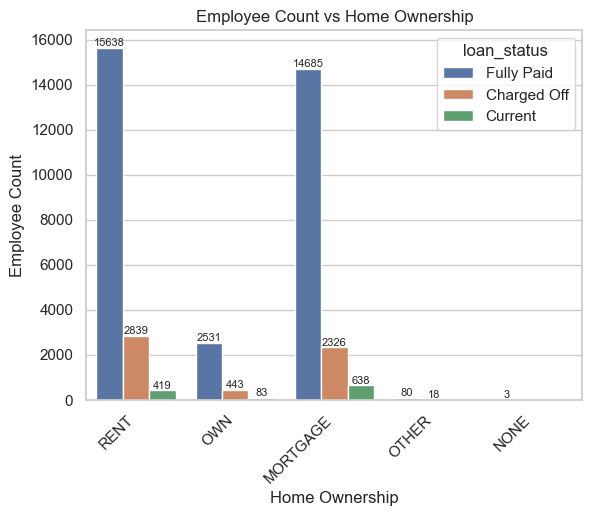

In [579]:
#Analyzing the count of employes according to the purpose of taking loans 

# Creating a countplot
empHomeOwn = sns.countplot(x=loan_df["home_ownership"],  hue='loan_status', data=loan_df)
loan_abs_values = loan_df['home_ownership'].value_counts(ascending=False).values
for container in empHomeOwn.containers:
    empHomeOwn.bar_label(container, fontsize=8)
# Set x-axis and y-axis labels
empHomeOwn.set_xlabel("Home Ownership", fontsize=12)
empHomeOwn.set_ylabel("Employee Count", fontsize=12)

# Set plot title
empHomeOwn.set_title("Employee Count vs Home Ownership", fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.show()

## ***********Insight*************************************
## Rent/Morgate have most number of defaulters as compare 
## ..to own
## ***********Insight*************************************

#### Step 5.12: Loan Status% by Sub-Grades

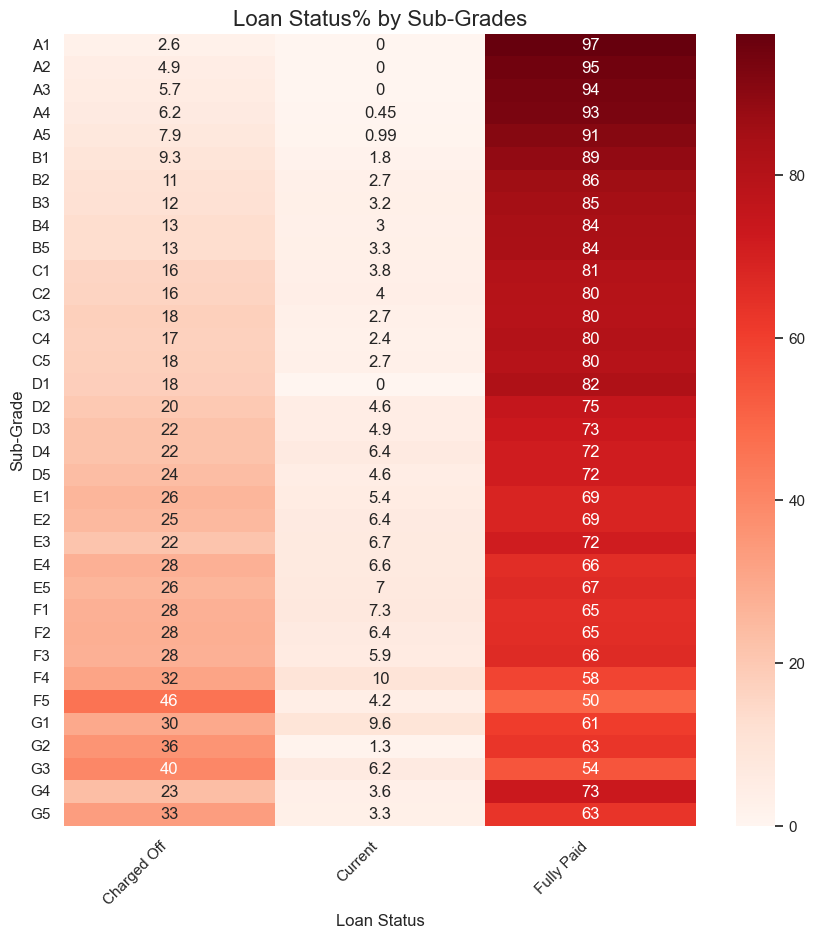

In [589]:
# Create a cross-tabulation for Grades vs count
crosstab = pd.crosstab(loan_df['grade'], loan_df['sub_grade'])

# Plot a stacked bar plot
plt.figure(figsize=(8, 9))
sns.heatmap(pd.crosstab( index=loan_df['sub_grade'], columns=loan_df['loan_status'],normalize='index')*100,cmap='Reds',annot=True)

# Add labels and title
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Sub-Grade', fontsize=12)
plt.title('Loan Status% by Sub-Grades', fontsize=16)

# set the legend
#plt.legend(loc='upper right', bbox_to_anchor=(1,1), title="Sub-Grade", fontsize='small', ncol = 4)

# Adjust layout to make space for the legend
plt.tight_layout(rect=[0, 0, 1.1, 1])  
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

## ***********Insight*************************************
## Sub-Grades from D2-G5 have higher tendency to default with F5 & G3 having 
## ..extreme tendency to default
## ***********Insight*************************************

#### Step 5.13: Bivariate Analysis : Income($) vs DTI Ratio(%)

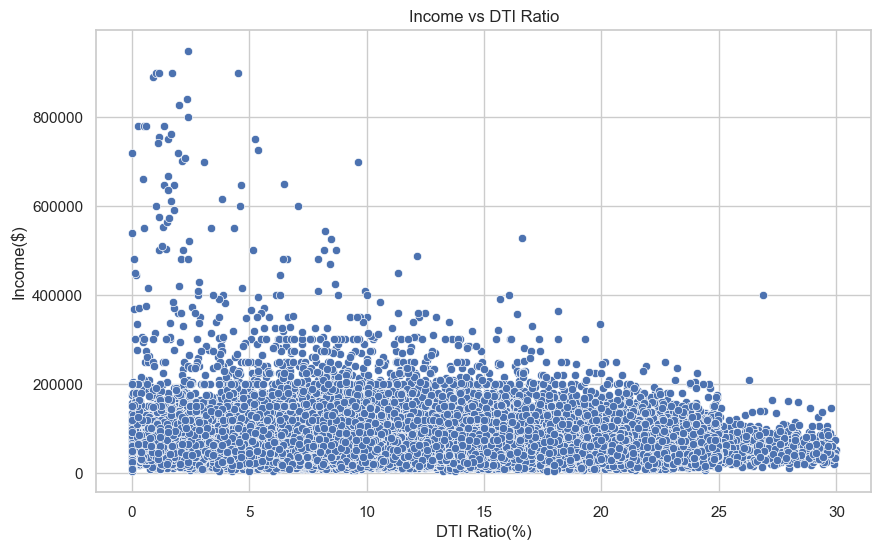

In [529]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dti', y='annual_inc', data=loan_df)

# Add title and labels
plt.title('Income vs DTI Ratio')
plt.xlabel('DTI Ratio(%)')
plt.ylabel('Income($)')

# Show plot
plt.show()

## ***********Insight*************************************
## DTI Ratio varies as per income, DTI Ratio increases 
## ..as Income decreases  
## ***********Insight*************************************